# **IPPR Expt 3: Image Smoothing and Sharpening**

Name: Shwetha Iyer

Batch: A4

PRN: 1032211195

Performed on: 15/2/24

Submitted on: 18/2/24

In [15]:
from skimage import data
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage

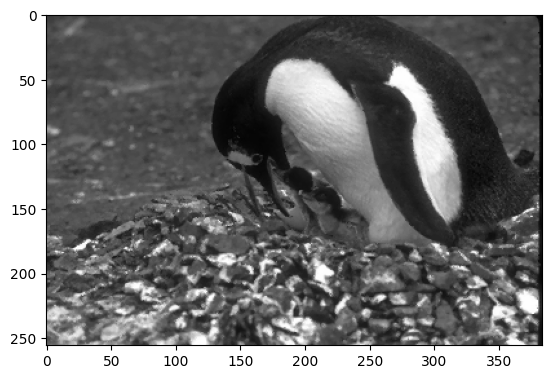

In [16]:
image = cv2.imread('/content/106020.png',0)
plt.imshow(image, cmap='gray')

# ***Adding noise to the image***

In [17]:
def add_snp_noise(image, noise_ratio=0.1):
    h, w = image.shape
    noisy_image = image.copy()
    noisy_pixels = int(h * w * noise_ratio)

    for _ in range(noisy_pixels):
        i, j = np.random.randint(0, h), np.random.randint(0, w)
        if np.random.rand() >= 0.5:
            noisy_image[i, j] = 0     #[0,0,0] for color image
        else:
            noisy_image[i, j] = 255   #[255,255,255] for color image
    return noisy_image


def add_gaussian_noise(image, std=40):
    noise = (np.random.normal(image.mean(), std, image.shape)*0.5).astype(np.uint8)
    noisy_image = cv2.add(image,noise)
    return noisy_image

Text(0.5, 1.0, 'Image with S&P Noise')

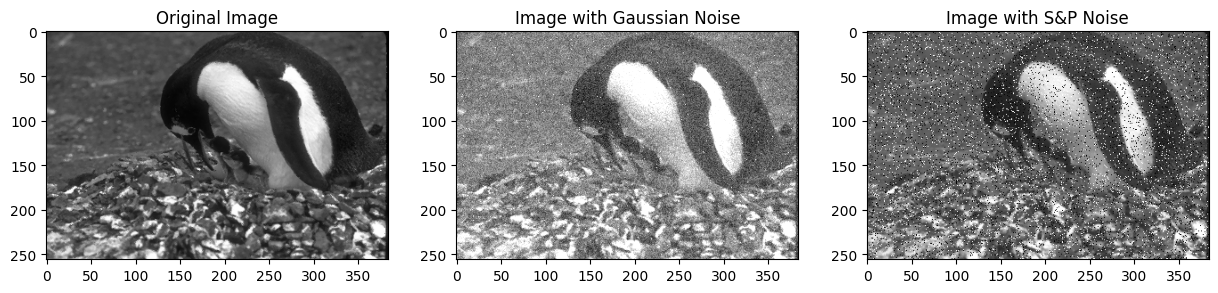

In [18]:
f,ax = plt.subplots(1,3, figsize=(15,5))
ax[0].imshow(image,cmap='gray')
ax[0].set_title("Original Image")

ax[1].imshow(add_gaussian_noise(image),cmap='gray')
ax[1].set_title("Image with Gaussian Noise")

ax[2].imshow(add_snp_noise(image),cmap='gray')
ax[2].set_title("Image with S&P Noise")

# ***Averaging & Gaussian Filters***

Text(0.5, 1.0, '15*15 Gaussian Filtered')

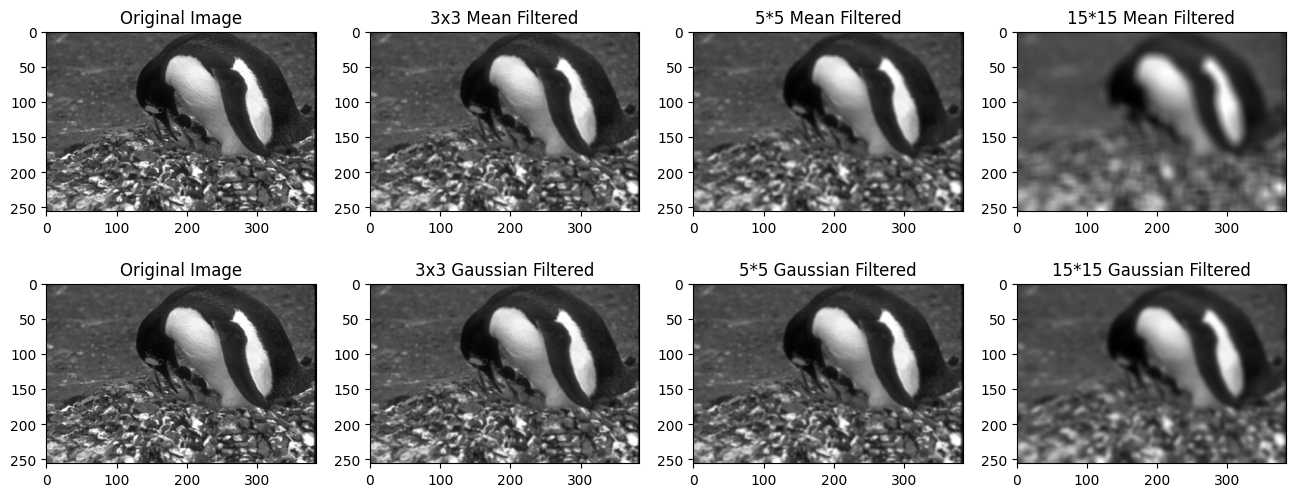

In [19]:
f,ax = plt.subplots(2,4, figsize=(16,6))
ax[0][0].imshow(image,cmap='gray')
ax[0][0].set_title("Original Image")

ax[0][1].imshow(cv2.blur(image, (3,3), 0),cmap='gray')
ax[0][1].set_title("3x3 Mean Filtered")

ax[0][2].imshow(cv2.blur(image, (5,5), 0),cmap='gray')
ax[0][2].set_title("5*5 Mean Filtered")

ax[0][3].imshow(cv2.blur(image, (15,15), 0),cmap='gray')
ax[0][3].set_title("15*15 Mean Filtered")

ax[1][0].imshow(image,cmap='gray')
ax[1][0].set_title("Original Image")

ax[1][1].imshow(cv2.GaussianBlur(image, (3,3), 0),cmap='gray')
ax[1][1].set_title("3x3 Gaussian Filtered")

ax[1][2].imshow(cv2.GaussianBlur(image, (5,5), 0),cmap='gray')
ax[1][2].set_title("5*5 Gaussian Filtered")

ax[1][3].imshow(cv2.GaussianBlur(image, (15,15), 0),cmap='gray')
ax[1][3].set_title("15*15 Gaussian Filtered")

# ***Median Filter for S&P Noise Removal***

Text(0.5, 1.0, 'Mean-Filtered Image')

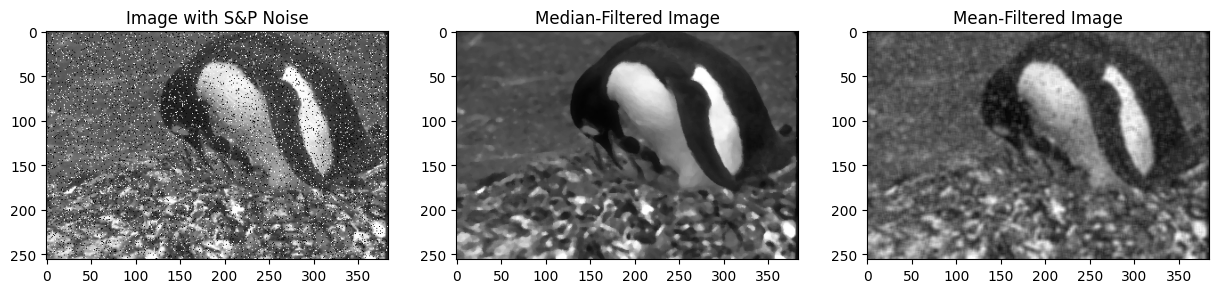

In [20]:
noisy_img = add_snp_noise(image)
f, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].imshow(noisy_img, cmap='gray')
ax[0].set_title("Image with S&P Noise")

ax[1].imshow(cv2.medianBlur(noisy_img, 5), cmap='gray')
ax[1].set_title("Median-Filtered Image")

ax[2].imshow(cv2.blur(noisy_img, (5,5), 0), cmap='gray')
ax[2].set_title("Mean-Filtered Image")

In [21]:
def add_salt_noise(image, noise_ratio=0.1):
    h, w = image.shape
    noisy_image = image.copy()
    noisy_pixels = int(h * w * noise_ratio)

    for _ in range(noisy_pixels):
        i, j = np.random.randint(0, h), np.random.randint(0, w)
        noisy_image[i, j] = 255
    return noisy_image

def add_pepper_noise(image, noise_ratio=0.1):
    h, w = image.shape
    noisy_image = image.copy()
    noisy_pixels = int(h * w * noise_ratio)

    for _ in range(noisy_pixels):
        i, j = np.random.randint(0, h), np.random.randint(0, w)
        noisy_image[i, j] = 0
    return noisy_image

# ***Min-Filter for Salt Noise Removal***

Text(0.5, 1.0, 'Min-Filtered Image')

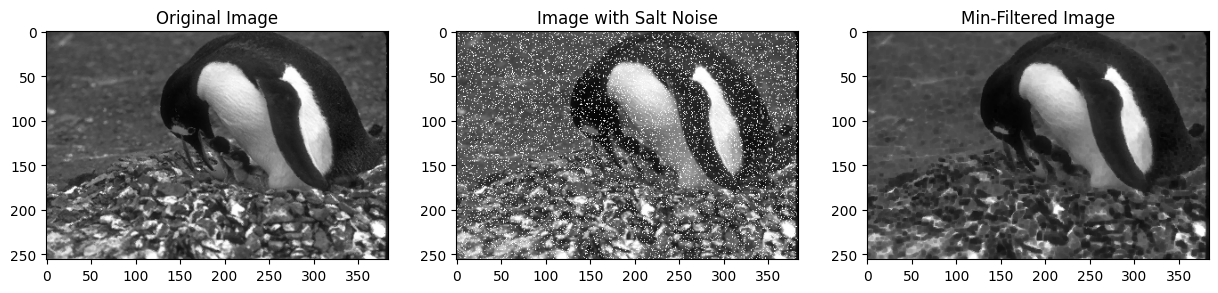

In [22]:
f, ax = plt.subplots(1,3,figsize=(15,5))
noisy_img = add_salt_noise(image)
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original Image")

ax[1].imshow(noisy_img, cmap='gray')
ax[1].set_title("Image with Salt Noise")

ax[2].imshow(ndimage.minimum_filter(noisy_img, size=3), cmap='gray')
ax[2].set_title("Min-Filtered Image")

# ***Max-Filter for Pepper Noise Removal***

Text(0.5, 1.0, 'Max-Filtered Image')

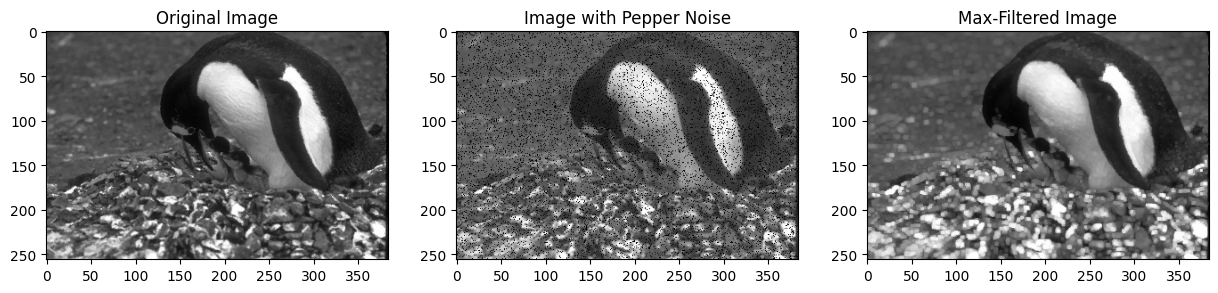

In [23]:
f, ax = plt.subplots(1,3,figsize=(15,5))
noisy_img = add_pepper_noise(image)
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original Image")

ax[1].imshow(noisy_img, cmap='gray')
ax[1].set_title("Image with Pepper Noise")

ax[2].imshow(ndimage.maximum_filter(noisy_img, size=3), cmap='gray')
ax[2].set_title("Max-Filtered Image")

# ***Edge Detection and Sharpening***

Text(0.5, 1.0, 'Sharpened Image')

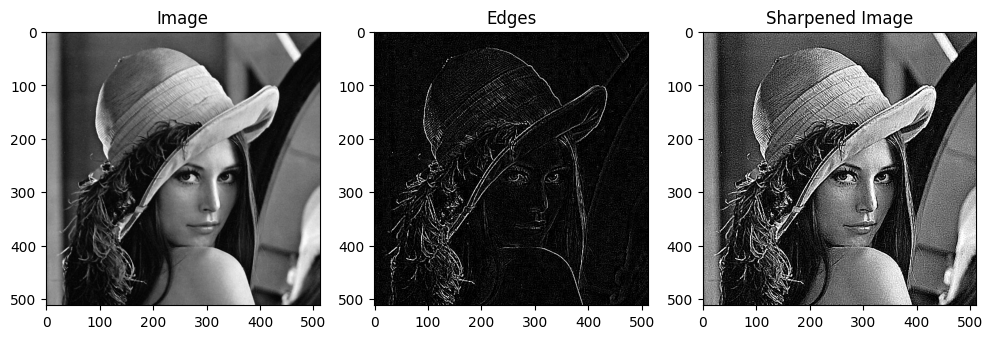

In [24]:
image = cv2.imread('/content/lena.png',0)
edges = cv2.filter2D(image, -1, np.array([[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]]))
sharp_img = cv2.filter2D(image, -1, np.array([[-1, -1, -1],[-1, 9, -1],[-1, -1, -1]]))

f, ax = plt.subplots(1,3,figsize=(12,6))
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Image")

ax[1].imshow(edges, cmap='gray')
ax[1].set_title("Edges")

ax[2].imshow(sharp_img, cmap='gray')
ax[2].set_title("Sharpened Image")

# ***Sharpening of Noisy Image***
Observation: Noise gets enhanced on sharpening.

Text(0.5, 1.0, 'Sharpened Image')

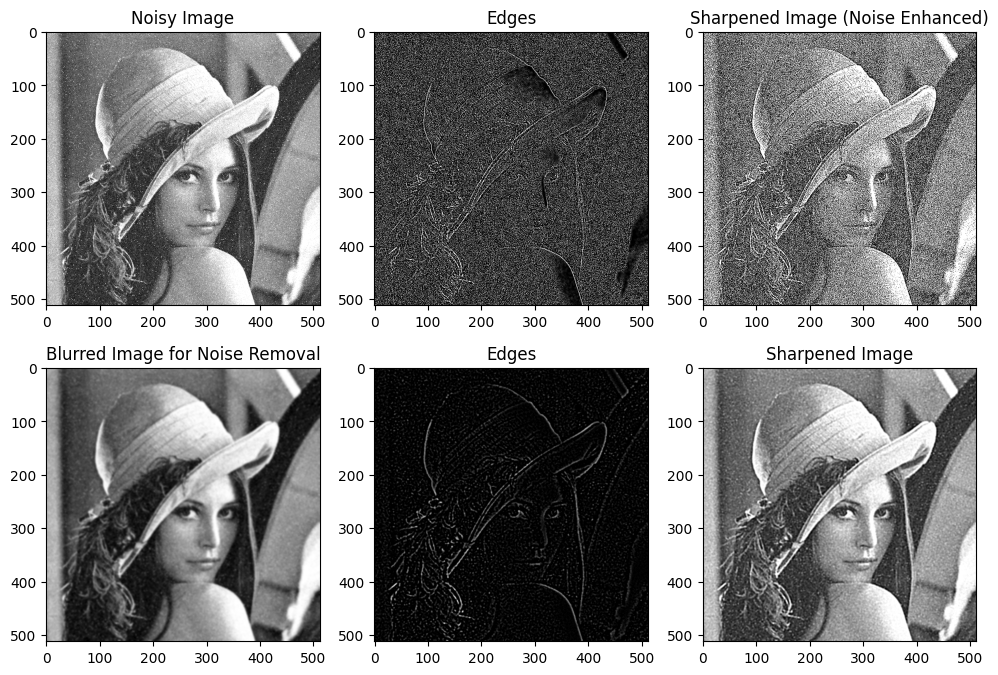

In [25]:
noisy_img = add_gaussian_noise(image)
edges = cv2.filter2D(noisy_img, -1, np.array([[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]]))
sharp_img = cv2.filter2D(noisy_img, -1, np.array([[-1, -1, -1],[-1, 9, -1],[-1, -1, -1]]))

blur_img = cv2.GaussianBlur(noisy_img, (7,7), 0)
edges1 = cv2.filter2D(blur_img, -1, np.array([[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]]))
sharp_img1 = cv2.filter2D(blur_img, -1, np.array([[-1, -1, -1],[-1, 9, -1],[-1, -1, -1]]))

f, ax = plt.subplots(2,3,figsize=(12,8))
ax[0][0].imshow(noisy_img, cmap='gray')
ax[0][0].set_title("Noisy Image")

ax[0][1].imshow(edges, cmap='gray')
ax[0][1].set_title("Edges")

ax[0][2].imshow(sharp_img, cmap='gray')
ax[0][2].set_title("Sharpened Image (Noise Enhanced)")

ax[1][0].imshow(blur_img, cmap='gray')
ax[1][0].set_title("Blurred Image for Noise Removal")

ax[1][1].imshow(edges1, cmap='gray')
ax[1][1].set_title("Edges")

ax[1][2].imshow(sharp_img1, cmap='gray')
ax[1][2].set_title("Sharpened Image")

# ***Results and Conclusion***

In this experiment, image smoothing and sharpening techniques were studied using spatial domain filters. We observed the outputs of mean and Gaussian blurring filters with varying mask sizes. These filters effectively reduced noise in the image, with median filters showing better results in removal of salt-and-pepper noise. Finally, we applied a Laplacian sharpening filter to enhance details in the image, comparing its effect for regular and noisy images.

# ***Post Lab Questions***

**Q1. Write a note on Sharpening Filters.**

Sharpening filters help emphasize details and enhance the edges of objects in an image.

Sharpening filters are of two types:

1.   ***Laplacian Filter:*** It is a second-order derivative operator. It detects the image along with horizontal and vertical directions collectively. A general Laplacian kernel contains a positive values at the center and negative values in cross pattern. The sum of the values of this filter is 0.


2.   ***Unsharp Masking or High Boost Filtering:*** It is a  technique that emphasizes the HF components representing the image details without eliminating LF components. First the image is blurred to supress most of high frequency components.

    Unsharp Mask = Original Image - Blurred image.

    This mask now contains most of the high frequency components that were blocked by the blurring filter. Adding the mask to original image will enhance the high frequency components.
    
 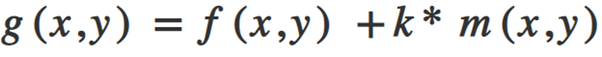

    k specifies what weightage shoould be given to the mask being added.

    - k = 1 represents Unsharp Masking.

    - k > 1 represents High Boost Filtering.


**Q2. Consider an input image row [4 3 2 1] with intensity values in the range 0 to 15. Determine
negative of the image row.**

Negative of image = 15 - [4 3 2 1]

= [11 12 13 14]

**Q3. Determine the new value of the central pixel of the following image by applying 3x3 size:
a) Mean filter b) Median filter c) Mode filter.**

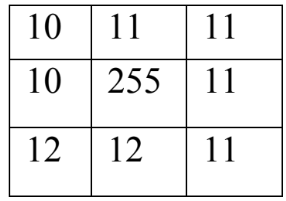

- Mean Filter: The mean is (10 + 11 + 11 + 10 + 255 + 11 + 12 + 12 + 11) / 9 = 90.56 = **91**

- Median Filter: The median the middle element of (10, 10, 11, 11, 11, 11, 12, 12, 255), which is **11**.

- Mode Filter: The mode is **11** as it appears more times than any other value.